In [1]:
%matplotlib inline
from fastai.basics import *

## Linear Regression with SGD from scratch
* generate data in a pytorch tensor
* create parameters and initialize them
* write update function
* fit
* plot

In [2]:
n = 100

In [5]:
x = torch.ones(n, 2)

In [14]:
x[:,0] = torch.rand(n) *2 -1
x[:5]

tensor([[-0.6888,  1.0000],
        [-0.1094,  1.0000],
        [ 0.1257,  1.0000],
        [ 0.6373,  1.0000],
        [-0.8209,  1.0000]])

In [15]:
a = tensor(3., 2)
a

tensor([3., 2.])

In [16]:
y = x@a + torch.randn(n)*0.2

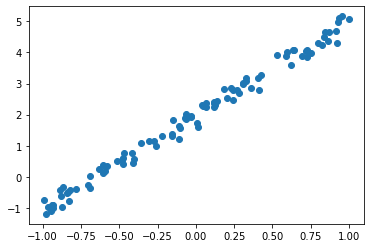

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], y)

In [90]:
w = torch.tensor([-1., -1])
w = nn.Parameter(w)
w

Parameter containing:
tensor([-1., -1.], requires_grad=True)

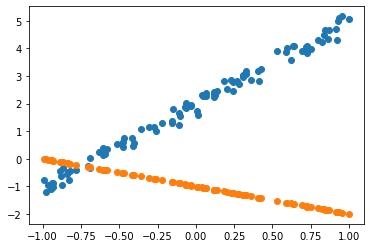

In [91]:
yhat = x@w
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], yhat.detach().numpy())

In [92]:
def my_mse(y, yhat):
    return torch.mean((y-yhat)**2)

In [93]:
def update(lr=0.1, plots=False):
    yhat = x@w
    loss = my_mse(y, yhat)
    loss.backward()
    with torch.no_grad():
        w.sub_(lr*w.grad)
        w.grad.zero_()
    if plots:
        plt.scatter(x[:,0], yhat.detach().numpy())
    return loss

Cycle 1, loss: 14.107195854187012
Cycle 2, loss: 10.349383354187012
Cycle 3, loss: 7.7692155838012695
Cycle 4, loss: 5.9661407470703125
Cycle 5, loss: 4.680694103240967
Cycle 6, loss: 3.7441208362579346
Cycle 7, loss: 3.046069383621216
Cycle 8, loss: 2.5138823986053467
Cycle 9, loss: 2.099292039871216
Cycle 10, loss: 1.7698755264282227
Cycle 11, loss: 1.5035569667816162
Cycle 12, loss: 1.2850571870803833
Cycle 13, loss: 1.1036018133163452
Cycle 14, loss: 0.9514325857162476
Cycle 15, loss: 0.8228362202644348
Cycle 16, loss: 0.7135102152824402
Cycle 17, loss: 0.6201390624046326
Cycle 18, loss: 0.5401161313056946
Cycle 19, loss: 0.47135254740715027
Cycle 20, loss: 0.4121473431587219
Cycle 21, loss: 0.3610965311527252
Cycle 22, loss: 0.31702837347984314
Cycle 23, loss: 0.2789567708969116
Cycle 24, loss: 0.24604587256908417
Cycle 25, loss: 0.21758313477039337
Cycle 26, loss: 0.19295918941497803
Cycle 27, loss: 0.17165106534957886
Cycle 28, loss: 0.15320877730846405
Cycle 29, loss: 0.1372448

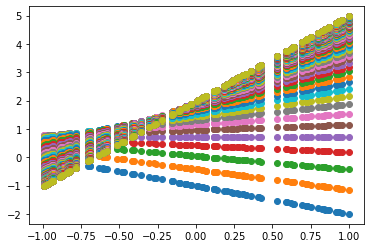

In [94]:
for i in range(1,100):
    loss = update(plots=True)
    print("Cycle {0}, loss: {1}".format(i, loss))

In [101]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

w = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x@w).detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@w)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.